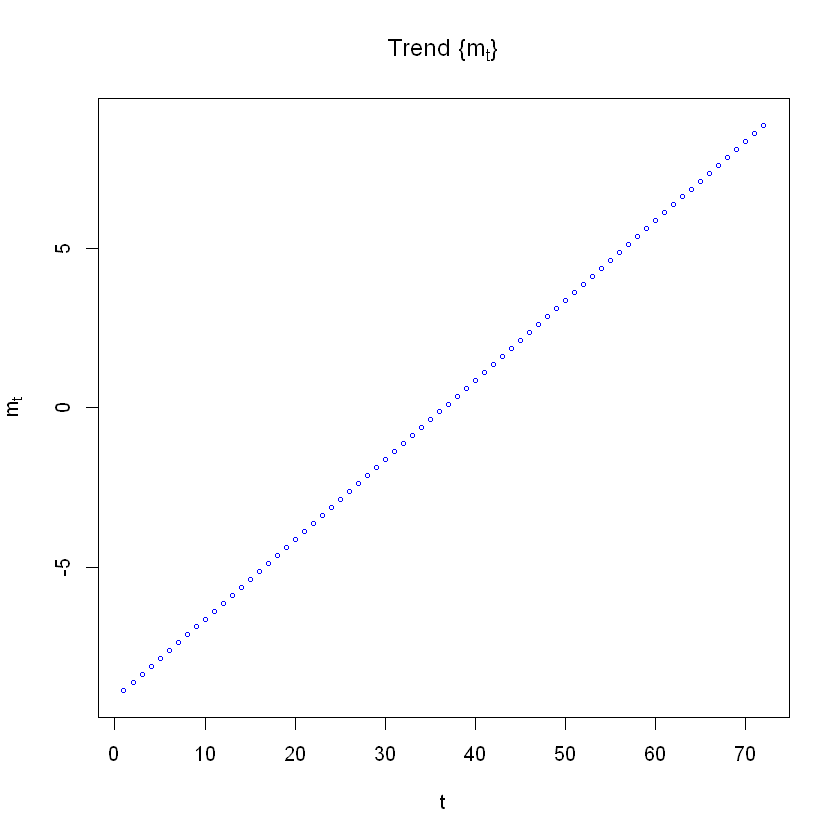

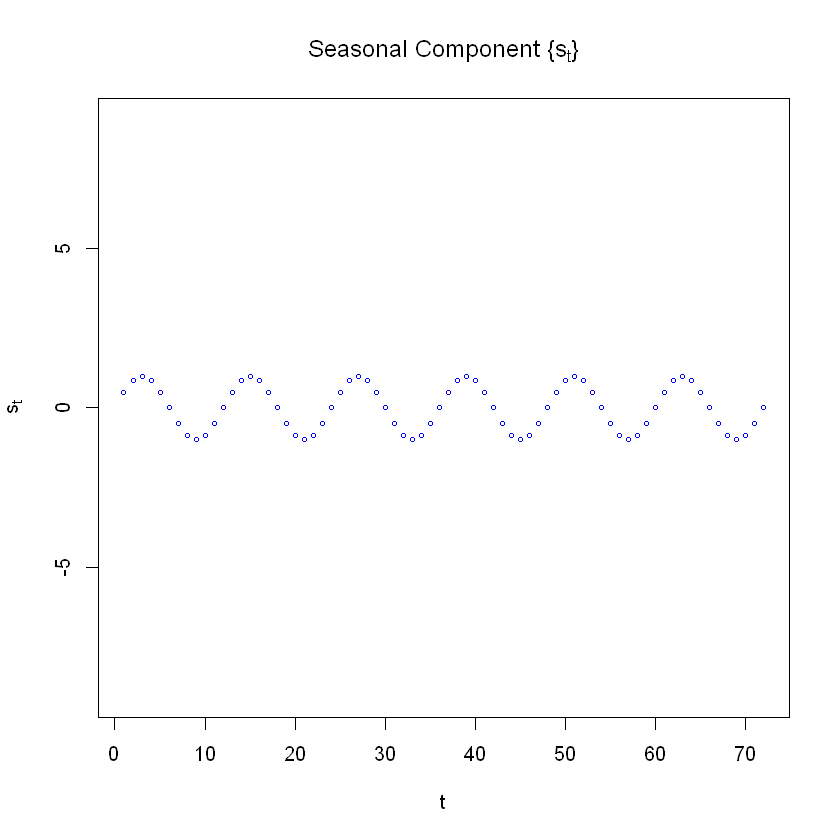

In [1]:

### Lab 3

 ### 4

filter.with.padding <- function(x,the.filter,iter=1)
{
  q <- (length(the.filter)-1)/2
  n <- length(x)
  w <- filter(c(rep(x[1],q),x,rep(x[n],q)),the.filter)[(q+1):(q+n)]
  if(iter > 1) for(i in 2:iter) w <- filter(c(rep(w[1],q),w,rep(w[n],q)),the.filter)[(q+1):(q+n)]
  w
}

# i)
eg.t <- 1:72
eg.m <- seq(-35.5, 35.5, 1)/4 # trend component

# trend plot
plot(eg.t, eg.m, col="blue", xlab = "t", type = "b", ylab = expression(m[t]), 
     main = expression(paste("Trend {",m[t],"}")), ylim = c(-9,9), cex=0.5)


eg.s <- rep(sin(2*pi*(1:12)/12),6) # seasonal component
# seasonal plot

plot(eg.t, eg.s, col="blue", xlab = "t", type = "b", ylab = expression(s[t]), 
     main = expression(paste("Seasonal Component {",s[t],"}")), ylim = c(-9,9), cex=0.5)

# time series
eg.ts <- eg.m + eg.s



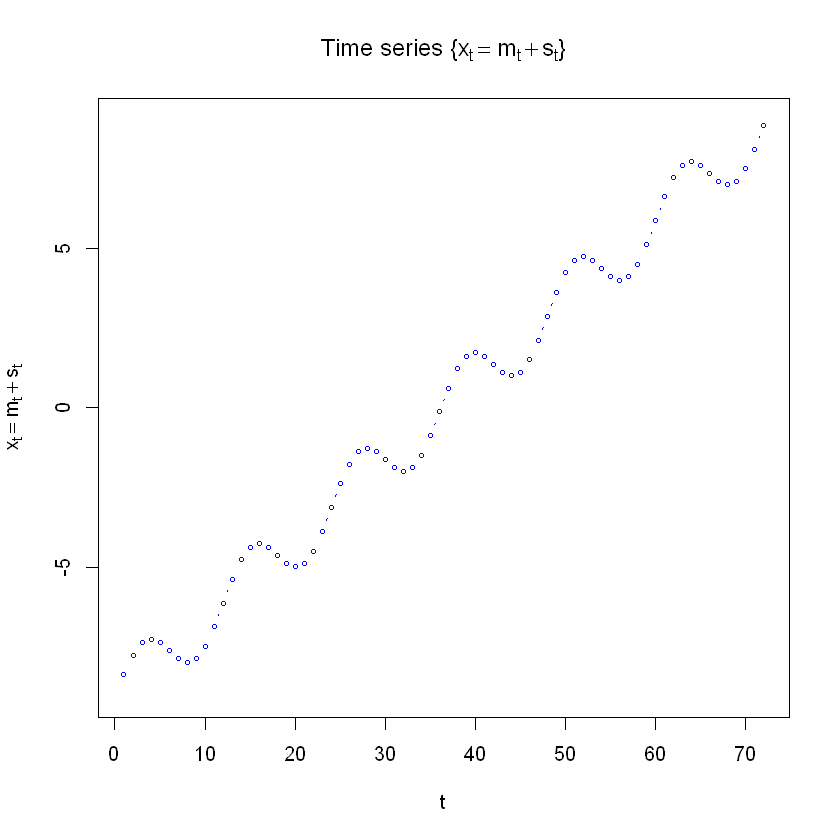

In [2]:
# ii)
# time series plot
plot(eg.t, eg.ts, col="blue", xlab = "t", type = "b", 
     ylab = expression(x[t]==m[t]+s[t]), main = expression(paste("Time series {",x[t]==m[t]+s[t],"}")), ylim = c(-9,9), cex=0.5)

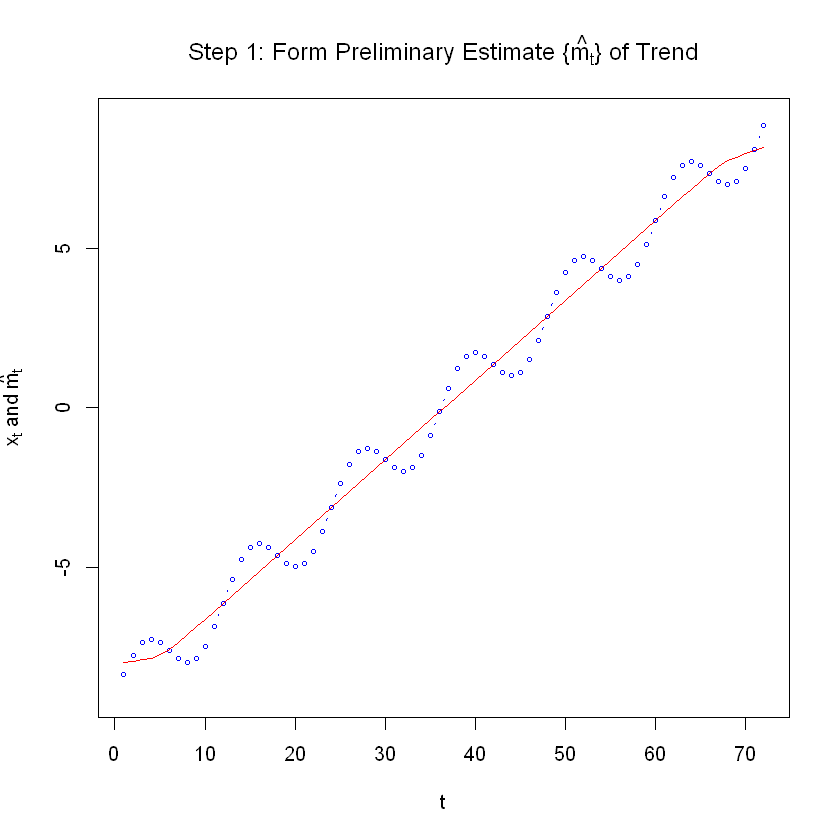

In [3]:
# iii)
# preliminary estimate of the trend using moving average smoother
eg.m.hat <- filter.with.padding(eg.ts, c(1/24, rep(1/12, 11), 1/24))

plot(eg.t, eg.ts, col="blue", xlab = "t", type = "b", ylab = expression(paste(x[t], " and ", hat(m[t]))), 
     main = expression(paste("Step 1: Form Preliminary Estimate {",hat(m[t]),"} of Trend")), ylim = c(-9,9), cex=0.5)

lines(eg.t, eg.m.hat, col="red")

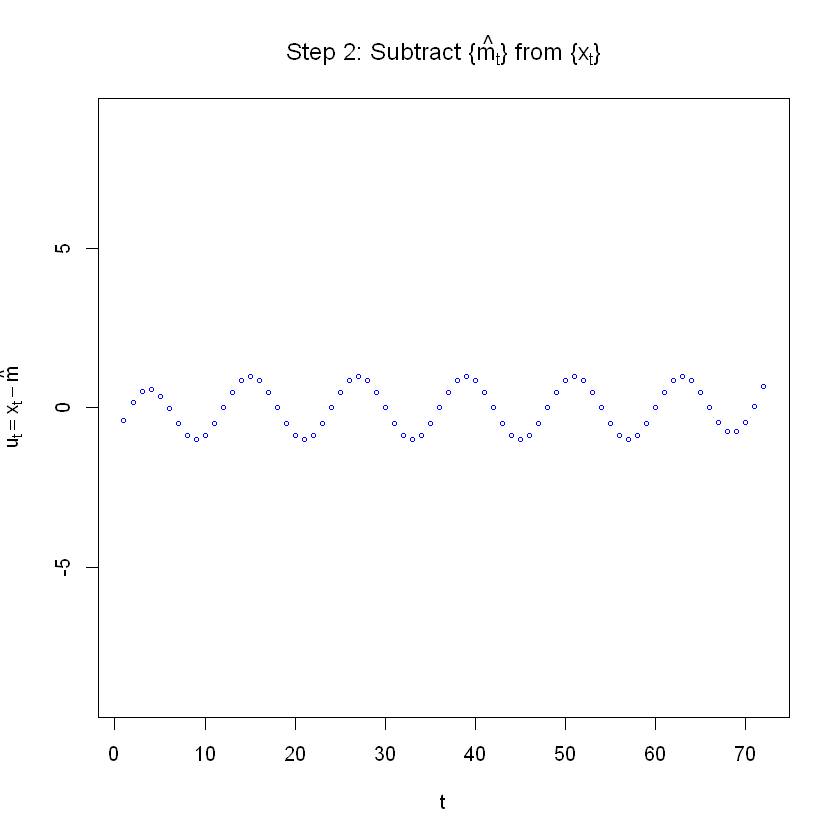

In [4]:
# iv)
# detrending 
eg.u <- eg.ts - eg.m.hat
plot(eg.t, eg.u, col="blue", xlab = "t", type = "b", ylab = expression(u[t]==x[t]-hat(m)), 
     main = expression(paste("Step 2: Subtract {",hat(m[t]),"} from {",x[t],"}")), ylim = c(-9,9), cex=0.5)

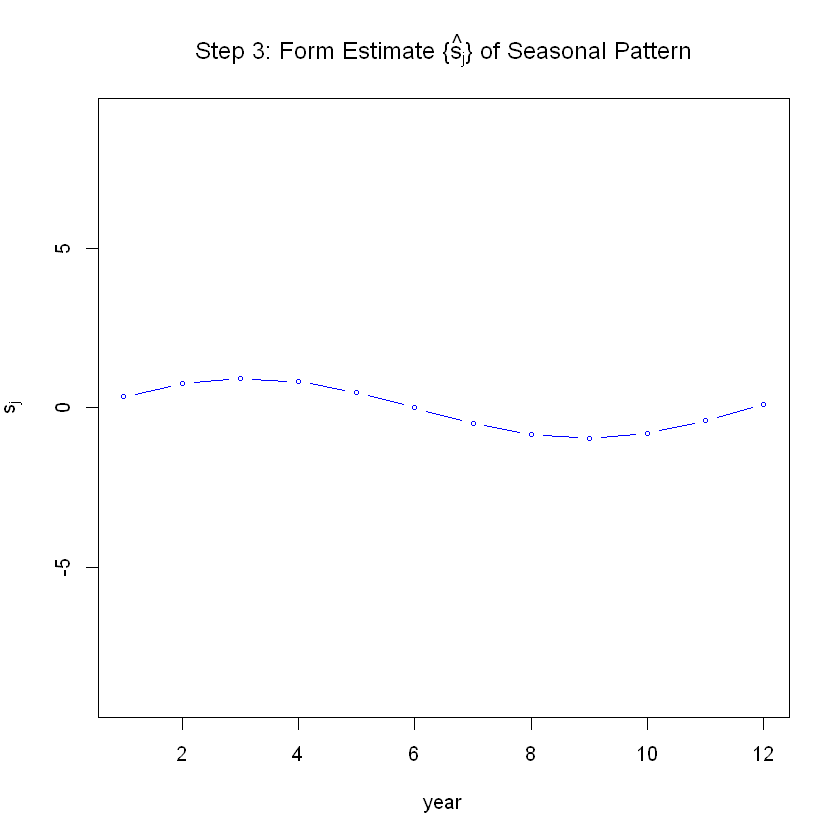

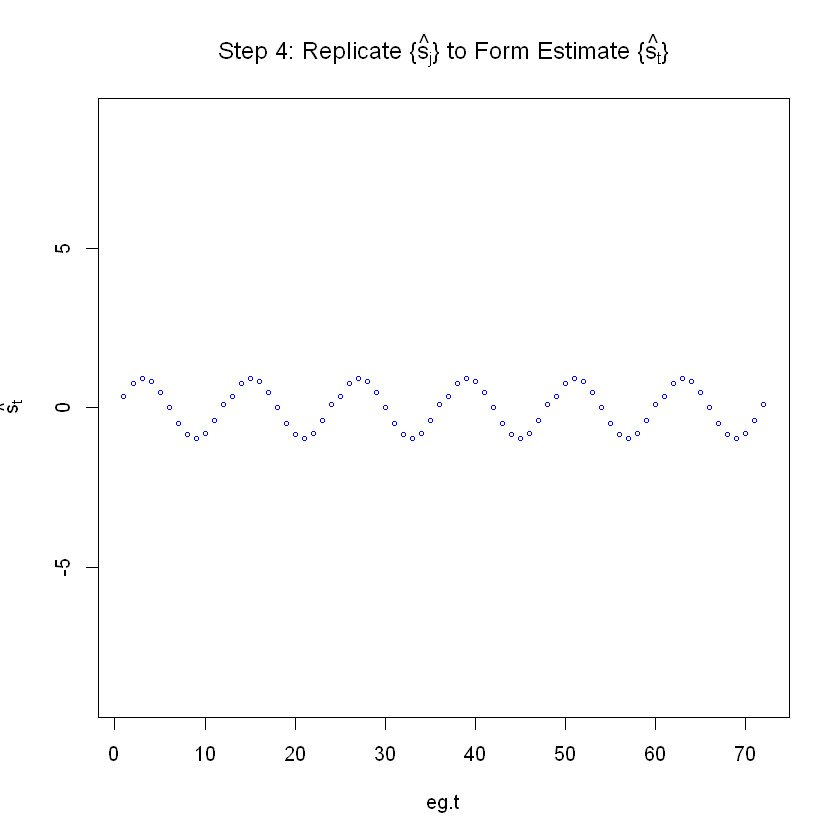

In [5]:
# v)

eg.wj <- rowMeans(matrix(eg.u, nrow=12))

plot(1:12, eg.wj-mean(eg.wj), col="blue", xlab = "year", type = "b", ylab=expression(s[j]), 
     main = expression(paste("Step 3: Form Estimate {",hat(s[j]),"} of Seasonal Pattern")), ylim = c(-9,9), cex=0.5)

eg.sj.hat <- rep(eg.wj-mean(eg.wj), 6)

plot(eg.t, eg.sj.hat, col="blue",type = "b", ylab = expression(hat(s[t])), 
     main = expression(paste("Step 4: Replicate {",hat(s[j]),"} to Form Estimate {",hat(s[t]),"}")), ylim = c(-9,9), cex=0.5)

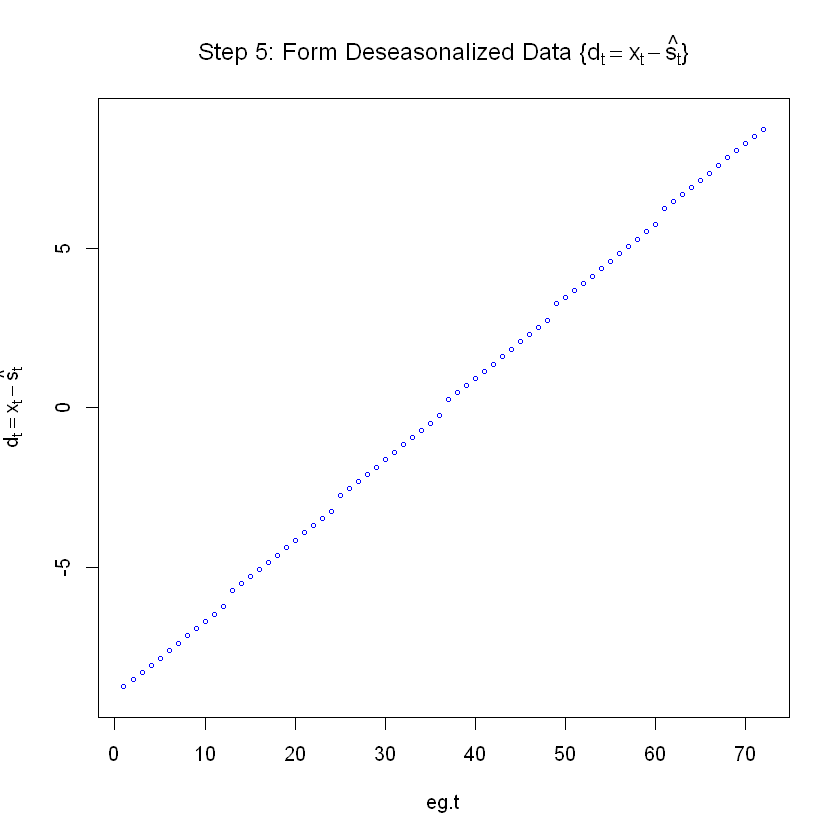

In [6]:
# vi)

eg.d <- eg.ts - eg.sj.hat

plot(eg.t, eg.d, col="blue",type = "b", ylab = expression(d[t]==x[t]-hat(s[t])), 
     main = expression(paste("Step 5: Form Deseasonalized Data {",d[t]==x[t]-hat(s[t]),"}")), ylim = c(-9,9), cex=0.5)


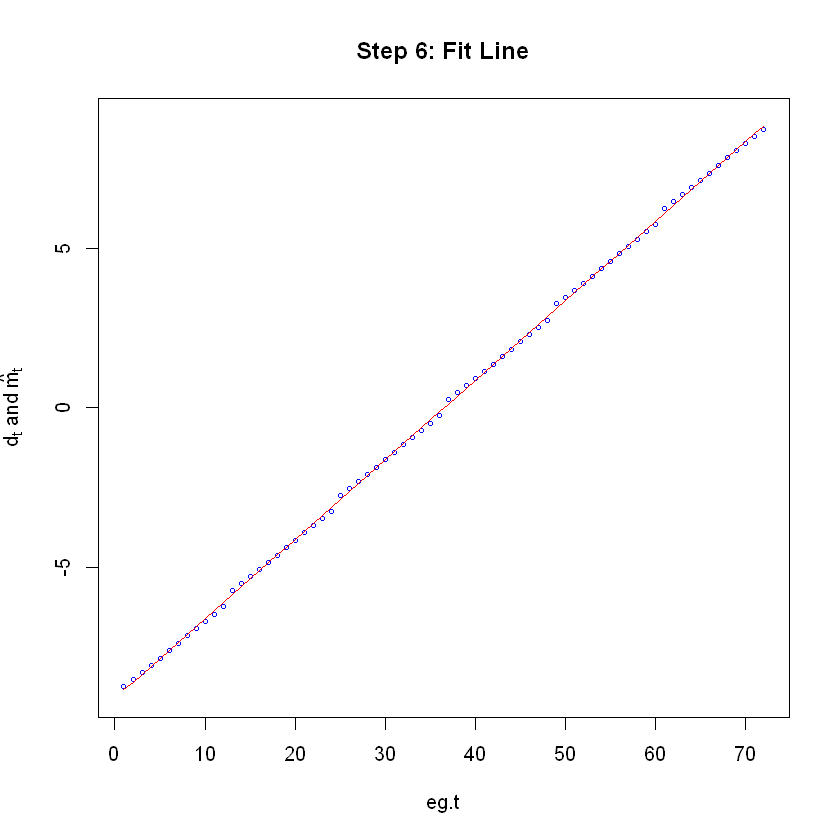

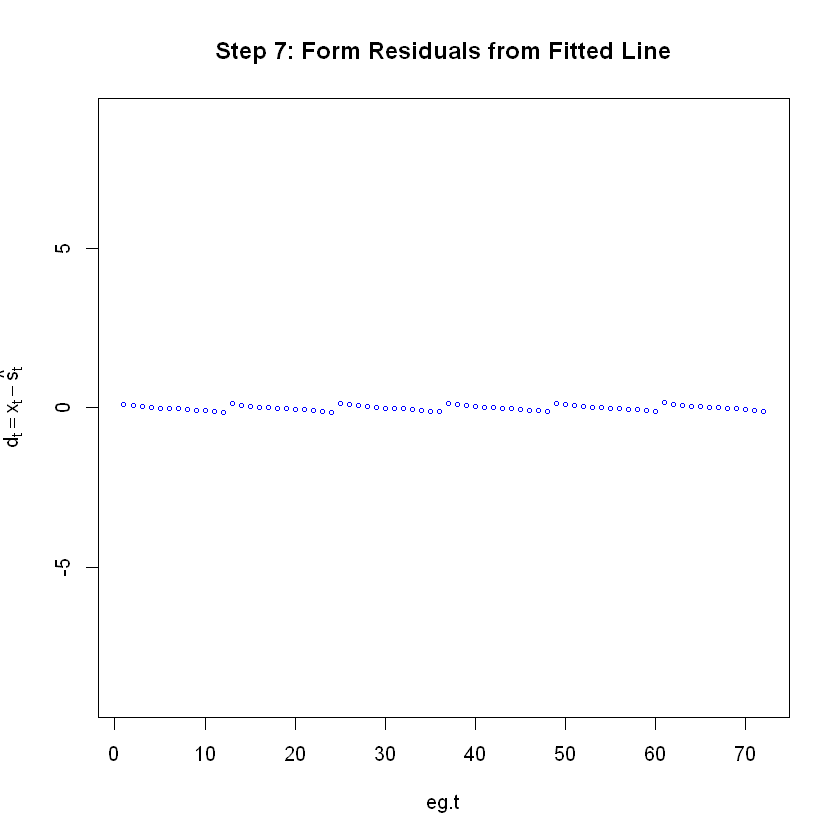

In [7]:
# vii)

eg.d.reg <- lm(eg.d ~ eg.t)

plot(eg.t, eg.d, col="blue",type = "b", ylab = expression(paste(d[t], " and ", hat(m[t]))), 
     main = "Step 6: Fit Line", ylim = c(-9,9), cex=0.5)
lines(eg.t, fitted(eg.d.reg), col="red")

plot(eg.t, resid(eg.d.reg), col="blue",type = "b", ylab = expression(d[t]==x[t]-hat(s[t])), 
     main = "Step 7: Form Residuals from Fitted Line", ylim = c(-9,9), cex=0.5)


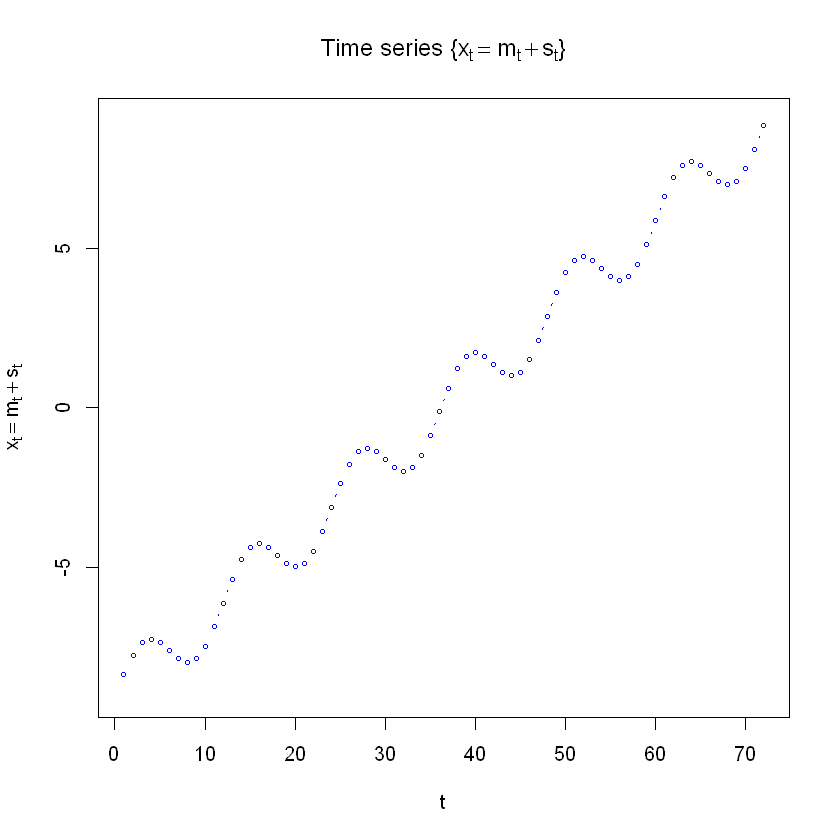

In [8]:
### 5


plot(eg.t, eg.ts, col="blue", xlab = "t", type = "b", 
     ylab = expression(x[t]==m[t]+s[t]), main = expression(paste("Time series {",x[t]==m[t]+s[t],"}")), ylim = c(-9,9), cex=0.5)

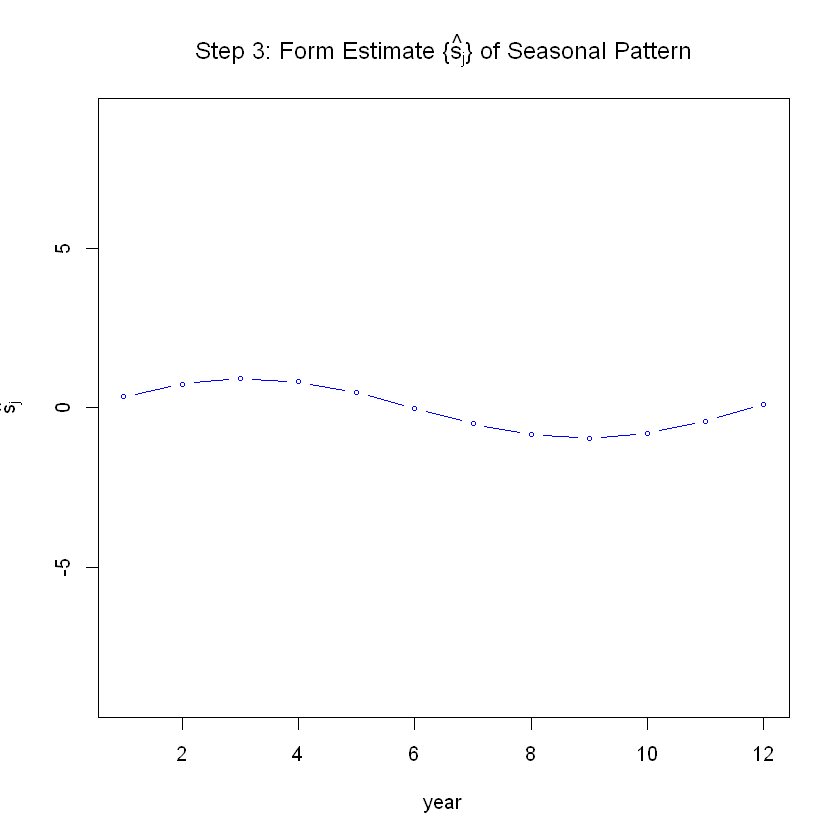

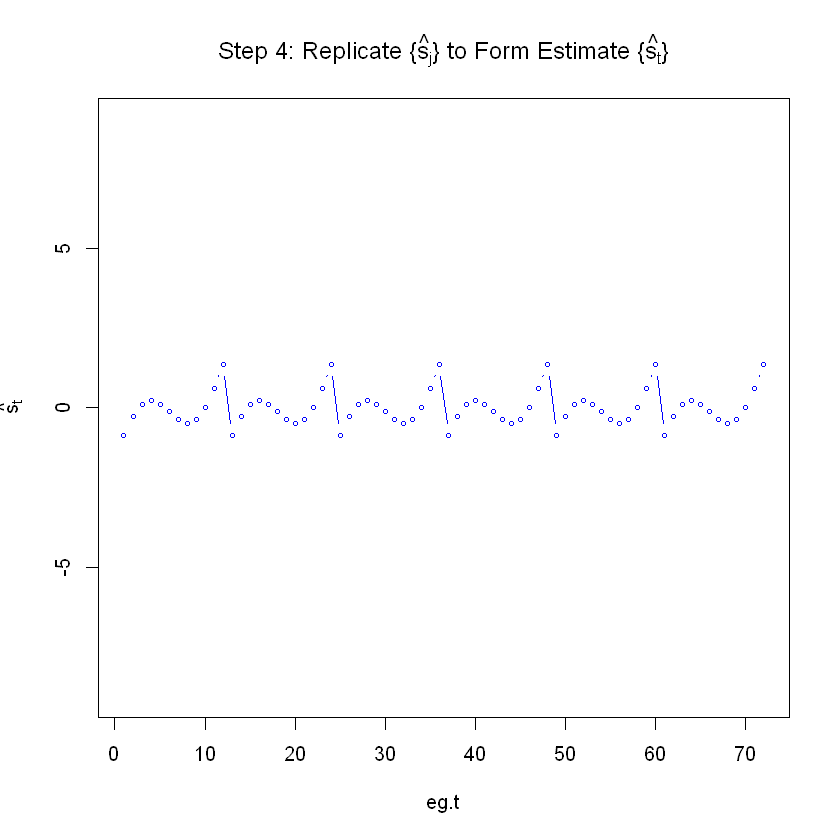

In [9]:
### i)
eg.wj2 <- rowMeans(matrix(eg.ts, nrow = 12))

### centering
### no preliminary detrending
plot(1:12, eg.wj-mean(eg.wj2), col="blue", xlab = "year", type = "b", ylab=expression(hat(s[j])), 
     main = expression(paste("Step 3: Form Estimate {",hat(s[j]),"} of Seasonal Pattern")), ylim = c(-9,9), cex=0.5)

eg.st.hat2 <- rep(eg.wj2 - mean(eg.wj2), 6)

plot(eg.t, eg.st.hat2, col="blue",type = "b", ylab = expression(hat(s[t])), 
     main = expression(paste("Step 4: Replicate {",hat(s[j]),"} to Form Estimate {",hat(s[t]),"}")), ylim = c(-9,9), cex=0.5)

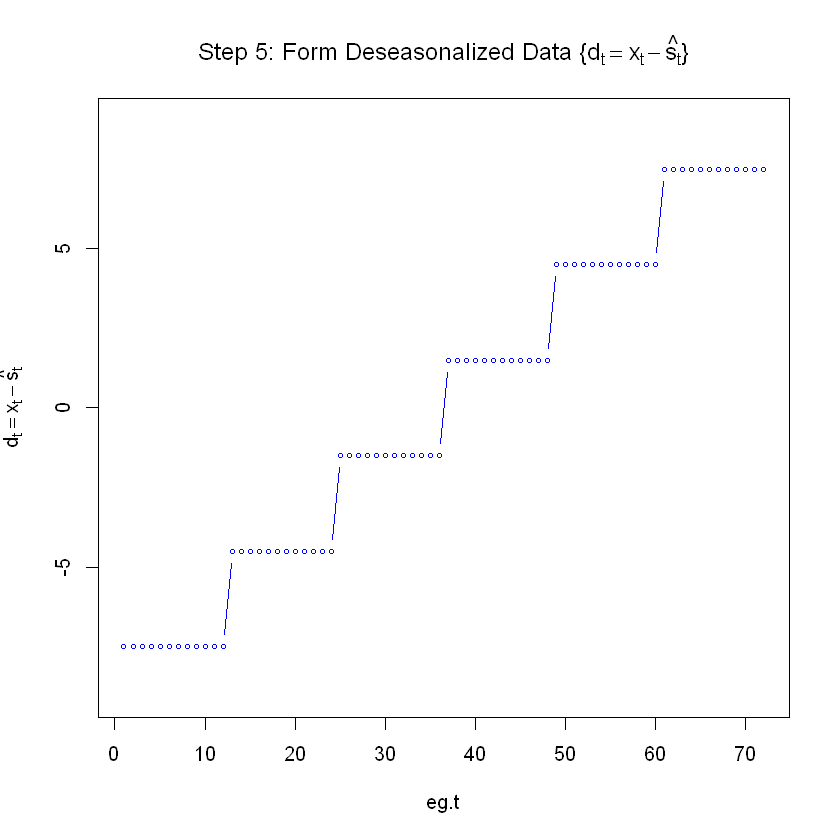

In [10]:
# ii)
# deseasonalize
eg.d2 <- eg.ts - eg.st.hat2

plot(eg.t, eg.d2, col="blue",type = "b", ylab = expression(d[t]==x[t]-hat(s[t])), 
     main = expression(paste("Step 5: Form Deseasonalized Data {",d[t]==x[t]-hat(s[t]),"}")), ylim = c(-9,9), cex=0.5)

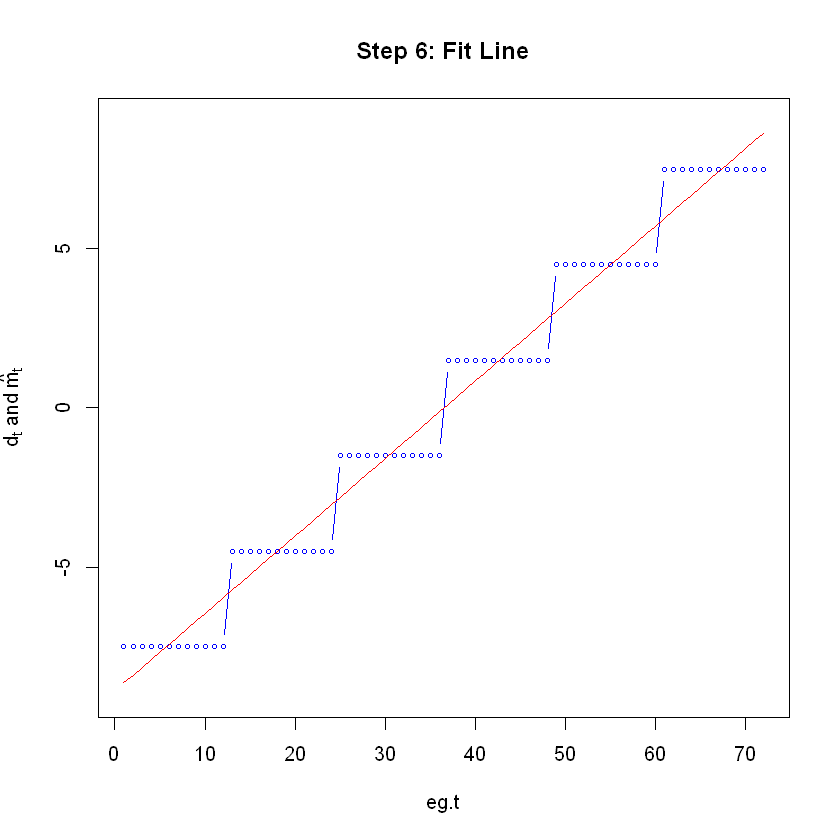

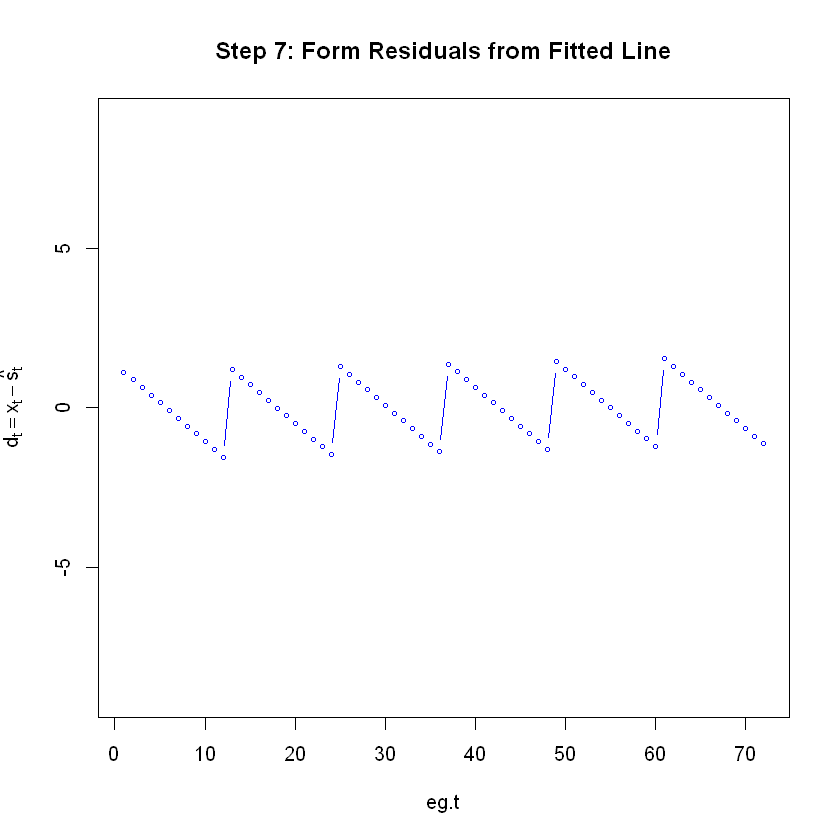

In [11]:
# iii)
# trend estimate of the deseasonalized series
eg.d.reg2 <- lm(eg.d2 ~ eg.t)

plot(eg.t, eg.d2, col="blue",type = "b", ylab = expression(paste(d[t], " and ", hat(m[t]))), 
     main = "Step 6: Fit Line", ylim = c(-9,9), cex=0.5)
lines(eg.t, fitted(eg.d.reg2), col="red")

plot(eg.t, resid(eg.d.reg2), col="blue",type = "b", ylab = expression(d[t]==x[t]-hat(s[t])), 
     main = "Step 7: Form Residuals from Fitted Line", ylim = c(-9,9), cex=0.5)